# **Classifying Generic Images With CNN**

This Jupyter Notebook contains code that trains and tests 3 separate Convolutional Neural Network (CNN) machine learning models. The data is directly imported from the publicly available dataset - CIFAKE: Real and AI-Generated Synthetic Images. Link to Dataset: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/data

## **Importing Dataset**

In [ ]:
import kagglehub
path = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3


## **Importing Initial Libraries and Setting Device to GPU**

Because the dataset is large, hardware acceleration is utilized to train the CNN models.

In [ ]:
import os
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

dataset_path = path
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

Using device: cuda


## **Creating Classes for 3 CNN Models**

In [ ]:
class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1, self).__init__()

        #Convolutional layers
        self.conv_layers = nn.Sequential(
            # First Conv Layer (32 filters)
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Second Conv Layer (64 filters)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third Conv Layer (64 filters)
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Fourth Conv Layer (64 filters)
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Fifth Conv Layer (128 filters)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Sixth Conv Layer (128 filters)
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        #Fully connected Dense layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),  #Flatten the output from the convolutional layers
            nn.Linear(128 * 4 * 4, 512),  # 128 * 4 * 4 is the size of the feature map
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout for regularization

            nn.Linear(512, 256),  #Second dense layer
            nn.ReLU(),
            nn.Dropout(0.5),  #Dropout for regularization

            nn.Linear(256, 16),  #Third dense layer
            nn.ReLU(),

            nn.Linear(16, 1),  #Output layer (1 unit for binary classification)
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()

        # Convolutional layers (4 layers)
        self.conv_layers = nn.Sequential(
            # First Conv Layer (32 filters)
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Second Conv Layer (64 filters)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third Conv Layer (64 filters)
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # Fourth Conv Layer (128 filters)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Fully connected Dense layers (4 layers)
        self.fc_layers = nn.Sequential(
            nn.Flatten(),  #Flatten the output from the convolutional layers
            nn.Linear(128 * 8 * 8, 512),  #128 * 2 * 2 is the size of the feature map after pooling
            nn.ReLU(),
            nn.Dropout(0.5),  #Dropout for regularization

            nn.Linear(512, 256),  #Second dense layer
            nn.ReLU(),
            nn.Dropout(0.5),  #Dropout for regularization

            nn.Linear(256, 128),  #Third dense layer
            nn.ReLU(),

            nn.Linear(128, 16),  #Fourth dense layer
            nn.ReLU(),

            nn.Linear(16, 1),  #Output layer (1 unit for binary classification)
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x



class CNNModel3(nn.Module):
    def __init__(self):
        super(CNNModel3, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 16),
            nn.ReLU(),

            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

## **Training each CNN Model with Varying Hyperparameters**

Defining transformation of image dimensions, defining model training function, and displaying some images from dataset

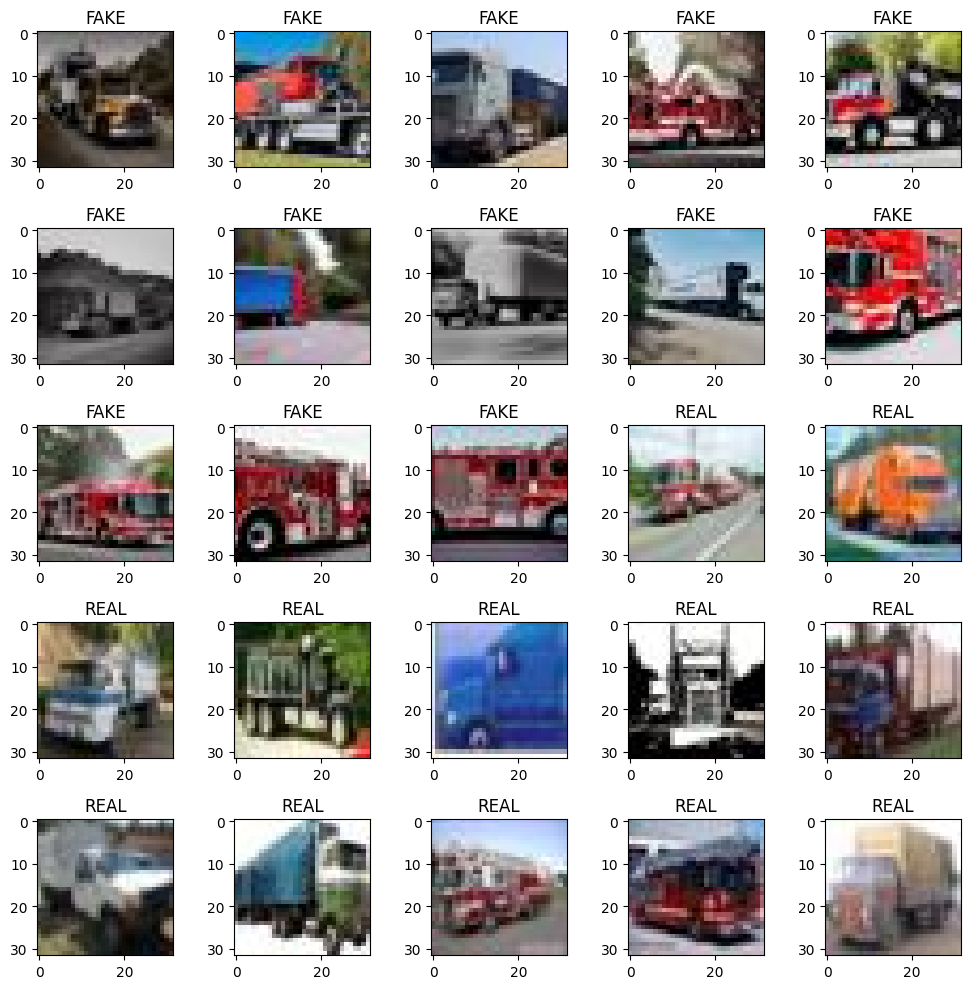

In [ ]:
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, "test"), transform=transform)

def train_model(model, train_loader, criterion, optimizer, device, epochs=32):
    model.train()
    train_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        loop = tqdm(train_loader, total=len(train_loader), desc=f"Epoch {epoch+1}/{epochs}")

        for images, labels in loop:
            images, labels = images.to(device), labels.float().to(device)

            optimizer.zero_grad()

            outputs = model(images).squeeze()

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            loop.set_postfix(loss=running_loss / len(train_loader))

        train_losses.append(running_loss / len(train_loader))
    return train_losses

def display_images(dataset, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    j = 0
    for i in range(num_images):

        image, label = dataset[j]
        image = image.permute(1, 2, 0)

        image = image * 0.5 + 0.5

        plt.subplot(5, 5, i + 1)
        plt.imshow(image.numpy())
        plt.title(class_names[label])
        plt.axis("on")
        j += 4000
    plt.tight_layout()
    plt.show()

class_names = train_dataset.classes
display_images(train_dataset, class_names)

In [ ]:
##########  Model 1 Training  ###########
print("CNN Model 1 Training Status: ")
train_loader1 = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader1 = DataLoader(test_dataset, batch_size=64, shuffle=False)
model1 = CNNModel1().to(device)
criterion1 = nn.BCELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.0001)
train_losses1 = train_model(model1, train_loader1, criterion1, optimizer1, device, epochs=32) #Number of Epochs for training.

##########  Model 2 Training  ###########
print("CNN Model 2 Training Status: ")
train_loader2 = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader2 = DataLoader(test_dataset, batch_size=64, shuffle=False)
model2 = CNNModel2().to(device)
criterion2 = nn.BCELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.0001)
train_losses2 = train_model(model2, train_loader2, criterion2, optimizer2, device, epochs=32) #Number of Epochs for training.

##########  Model 3 Training  ###########
print("CNN Model 3 Training Status: ")
train_loader3 = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader3 = DataLoader(test_dataset, batch_size=128, shuffle=False)
model3 = CNNModel3().to(device)
criterion3 = nn.BCELoss()
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)
train_losses3 = train_model(model3, train_loader3, criterion3, optimizer3, device, epochs=16) #Number of Epochs for training.

CNN Model 1 Training Status: 


Epoch 32/32: 100%|██████████| 1563/1563 [00:58<00:00, 26.68it/s, loss=0.0149]


CNN Model 2 Training Status: 


Epoch 32/32: 100%|██████████| 1563/1563 [00:58<00:00, 26.70it/s, loss=0.0125]


CNN Model 3 Training Status: 


Epoch 16/16: 100%|██████████| 782/782 [00:54<00:00, 14.23it/s, loss=0.039]


## **Testing each CNN Model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).squeeze()
            predicted = (outputs > 0.5).long()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

def plot_training_loss(train_losses, model_name):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', color='r', marker='o')
    plt.title(f'Training Loss vs Epochs for {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    y_ticks = np.arange(0.00, 0.60, 0.05)
    plt.yticks(y_ticks)
    plt.ylim(0.00, 0.55)
    plt.grid(True)
    plt.legend()
    plt.show()

## **Visualizing Results of Each Model**

### CNN Model 1 Results


CNN Model 1 Data Visualization
Accuracy: 96.14%


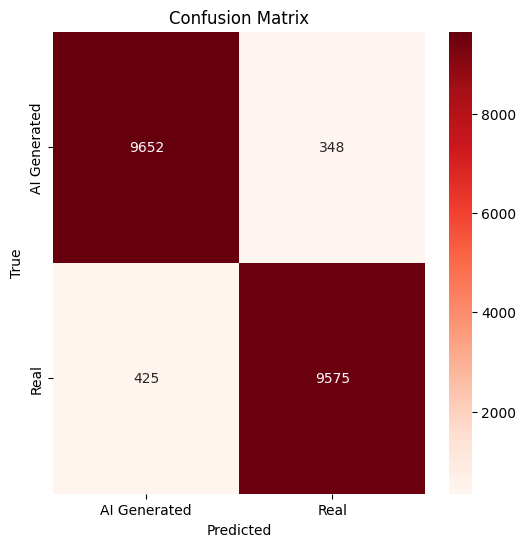

True Positives (TP): 9575
True Negatives (TN): 9652
False Positives (FP): 348
False Negatives (FN): 425

Precision: 96.49%
Recall: 95.75%

Classification Report:

              precision    recall  f1-score   support

AI Generated       0.96      0.97      0.96     10000
        Real       0.96      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000




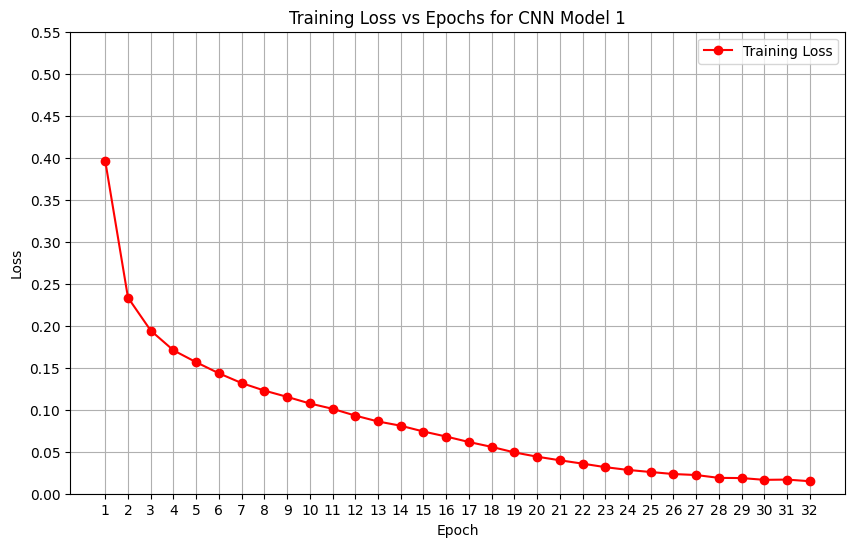

In [ ]:
##########  Model 1 Testing  ###########
predictions, true_labels = evaluate_model(model1, test_loader1, device)

accuracy = accuracy_score(true_labels, predictions)
print()
print("CNN Model 1 Data Visualization")
print(f"Accuracy: {accuracy * 100:.2f}%")



cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["AI Generated", "Real"], yticklabels=["AI Generated", "Real"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print()

report = classification_report(true_labels, predictions, target_names=["AI Generated", "Real"])
print("Classification Report:")
print()
print(report)
print()
plot_training_loss(train_losses1, 'CNN Model 1')

### CNN Model 2 Results


CNN Model 2 Data Visualization
Accuracy: 96.30%


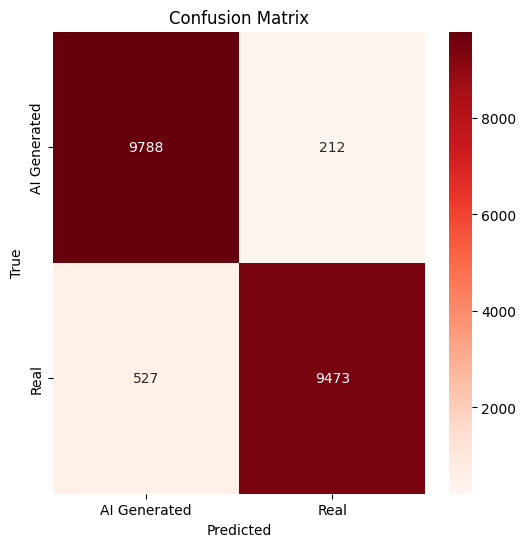

True Positives (TP): 9473
True Negatives (TN): 9788
False Positives (FP): 212
False Negatives (FN): 527

Precision: 97.81%
Recall: 94.73%

Classification Report:

              precision    recall  f1-score   support

AI Generated       0.95      0.98      0.96     10000
        Real       0.98      0.95      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000




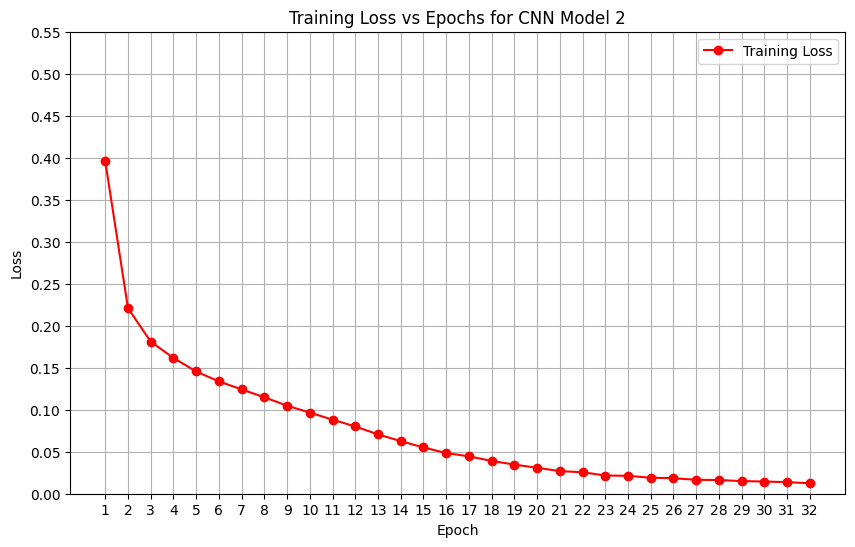

In [ ]:
##########  Model 2 Testing  ###########
predictions, true_labels = evaluate_model(model2, test_loader2, device)

accuracy = accuracy_score(true_labels, predictions)
print()
print("CNN Model 2 Data Visualization")
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["AI Generated", "Real"], yticklabels=["AI Generated", "Real"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print()

report = classification_report(true_labels, predictions, target_names=["AI Generated", "Real"])
print("Classification Report:")
print()
print(report)
print()
plot_training_loss(train_losses2, 'CNN Model 2')

### CNN Model 3 Results


CNN Model 3 Data Visualization
Accuracy: 96.02%


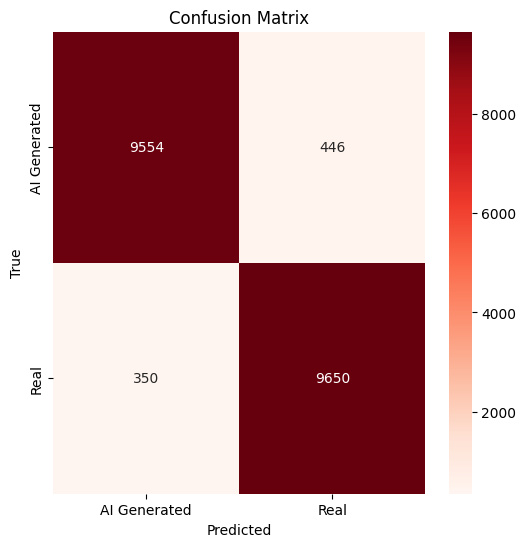

True Positives (TP): 9650
True Negatives (TN): 9554
False Positives (FP): 446
False Negatives (FN): 350

Precision: 95.58%
Recall: 96.50%

Classification Report:

              precision    recall  f1-score   support

AI Generated       0.96      0.96      0.96     10000
        Real       0.96      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000




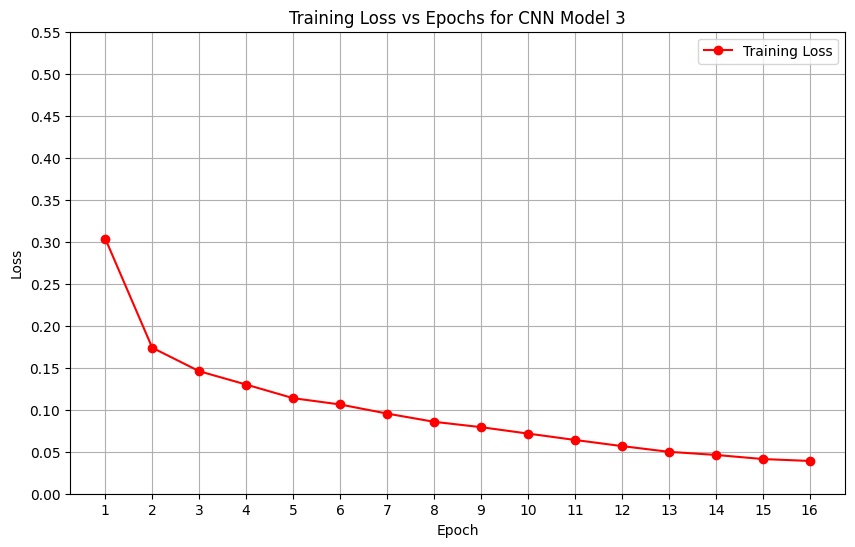

In [ ]:
##########  Model 3 Testing  ###########
predictions, true_labels = evaluate_model(model3, test_loader3, device)
accuracy = accuracy_score(true_labels, predictions)
print()
print("CNN Model 3 Data Visualization")
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["AI Generated", "Real"], yticklabels=["AI Generated", "Real"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print()

report = classification_report(true_labels, predictions, target_names=["AI Generated", "Real"])
print("Classification Report:")
print()
print(report)
print()
plot_training_loss(train_losses3, 'CNN Model 3')